In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

import torch
import numpy as np

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [53]:
# CSV 파일에 접근
maml_norm_info = pd.read_csv('../MAML_filter128/MAML_filter128_inner_loop.csv')
arbiter_norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot_7173/MAML+Arbiter_5way_5shot_inner_loop.csv')
arbiter_norm_info_withoutWN = pd.read_csv('../MAML+Arbiter_5way_5shot_withoutWN/MAML+Arbiter_5way_5shot_inner_loop.csv')
arbiter_norm_info_withoutGN = pd.read_csv('../MAML+Arbiter_5way_5shot_withoutGN/MAML+Arbiter_5way_5shot_inner_loop.csv')

# 훈련 정보만 가지고 온다
maml_norm_info_train = maml_norm_info[maml_norm_info['phase']=='train']
arbiter_norm_info_train= arbiter_norm_info[arbiter_norm_info['phase']=='train']
arbiter_norm_info_withoutWN_train= arbiter_norm_info_withoutWN[arbiter_norm_info_withoutWN['phase']=='train']
arbiter_norm_info_withoutGN_train= arbiter_norm_info_withoutGN[arbiter_norm_info_withoutGN['phase']=='train']

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [54]:
maml_norm_info_train

,current_iter,phase,num_step,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_gsnr,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,...,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,all_grads_var,all_grads_l2norm,all_grads_mean,all_weights_norm,all_weights_var,all_weights_mean,gsnr
0,0,train,0,0.007952,838.631714,21.844851,0.138055,0.000458,-0.000998,124.668365,...,0.013295,0.007440,0.000014,0.006019,52.753819,0.000094,20.014458,0.000866,-0.000011,1.476242e-06
1,0,train,1,-0.010638,286.554321,7.811492,0.017548,0.006449,-0.000892,124.754181,...,0.009295,0.005382,0.000007,0.000707,18.120657,-0.001695,20.014097,0.000866,0.000006,4.063592e-03
2,0,train,2,0.007446,243.480408,7.155235,0.014763,0.003756,-0.000966,124.866447,...,0.005311,0.002986,0.000002,0.000508,15.331646,-0.000881,20.014307,0.000866,0.000015,1.527901e-03
3,0,train,3,-0.001868,98.586411,3.037661,0.002667,0.001308,-0.000948,124.852539,...,0.003817,0.002298,0.000001,0.000088,6.378122,0.000035,20.014563,0.000866,0.000015,1.371712e-05
4,0,train,4,-0.001408,38.728363,1.070835,0.000330,0.006011,-0.000934,124.862656,...,0.003813,0.002273,0.000001,0.000008,1.945066,0.000106,20.014664,0.000866,0.000014,1.376003e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813063,49999,train,0,0.092057,725.865845,22.150845,0.133538,0.063461,-0.003621,614.025269,...,0.754736,0.382176,0.036480,0.005999,52.666157,0.000708,148.418350,0.046720,-0.030404,8.359342e-05
813064,49999,train,1,-0.027054,255.054932,7.695545,0.016409,0.044607,-0.003350,613.977661,...,0.746736,0.376179,0.035343,0.004339,44.791573,-0.000202,148.418442,0.046720,-0.030402,9.433458e-06
813065,49999,train,2,-0.012012,106.333252,2.962840,0.002396,0.060203,-0.003230,613.971802,...,0.742632,0.374748,0.035075,0.001342,24.904919,-0.000088,148.418533,0.046721,-0.030401,5.717824e-06
813066,49999,train,3,0.000282,23.925806,0.652391,0.000123,0.000646,-0.003233,613.979065,...,0.743906,0.375526,0.035221,0.000050,4.789188,0.000005,148.418533,0.046721,-0.030401,5.847174e-07


In [55]:
maml_per_inner_loop_step = maml_norm_info_train.groupby('num_step')
arbiter_per_inner_loop_step = arbiter_norm_info_train.groupby('num_step')
arbiter_withoutWN_per_inner_loop_step = arbiter_norm_info_withoutWN_train.groupby('num_step')
arbiter_withoutGN_per_inner_loop_step = arbiter_norm_info_withoutGN_train.groupby('num_step')

# 1. Weight Norm

Text(0.5, 1.0, 'Weight norm')

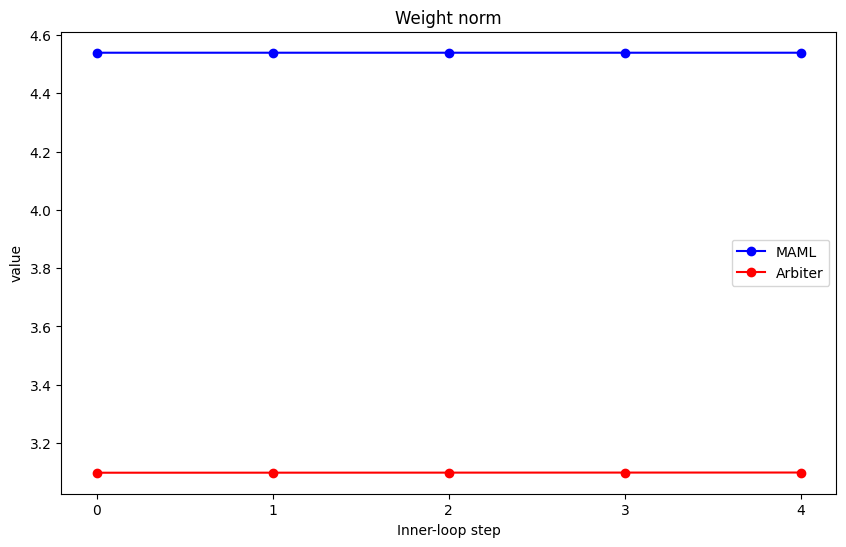

In [67]:
group_names = []

for name, group in maml_per_inner_loop_step:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_per_inner_loop_step['all_weights_norm'].mean()
arbiter_mean_df = arbiter_per_inner_loop_step['all_weights_norm'].mean()
arbiter_withoutWN_mean_df = arbiter_withoutWN_per_inner_loop_step['all_weights_norm'].mean()
arbiter_withoutGN_mean_df = arbiter_withoutGN_per_inner_loop_step['all_weights_norm'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values
arbiter_withoutWN_means = arbiter_withoutWN_mean_df.values
arbiter_withoutGN_means = arbiter_withoutGN_mean_df.values

# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)
arbiter_withoutWN_means = np.log(arbiter_withoutWN_means)
arbiter_withoutGN_means = np.log(arbiter_withoutGN_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Weight norm')

Text(0.5, 1.0, 'Weight variance')

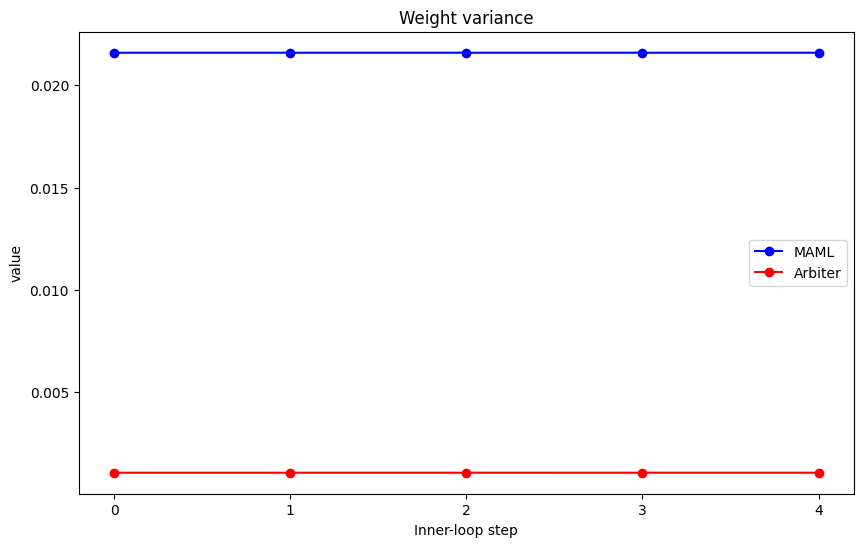

In [57]:
group_names = []

for name, group in maml_per_inner_loop_step:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_per_inner_loop_step['all_weights_var'].mean()
arbiter_mean_df = arbiter_per_inner_loop_step['all_weights_var'].mean()
arbiter_withoutWN_mean_df = arbiter_withoutWN_per_inner_loop_step['all_weights_var'].mean()
arbiter_withoutGN_mean_df = arbiter_withoutGN_per_inner_loop_step['all_weights_var'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values
arbiter_withoutWN_means = arbiter_withoutWN_mean_df.values
arbiter_withoutGN_means = arbiter_withoutGN_mean_df.values

# 데이터에 로그 변환 적용
# maml_means = np.log(maml_means)
# arbiter_means = np.log(arbiter_means)
# arbiter_withoutWN_means = np.log(arbiter_withoutWN_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Weight variance')

Text(0.5, 1.0, 'Grad norm')

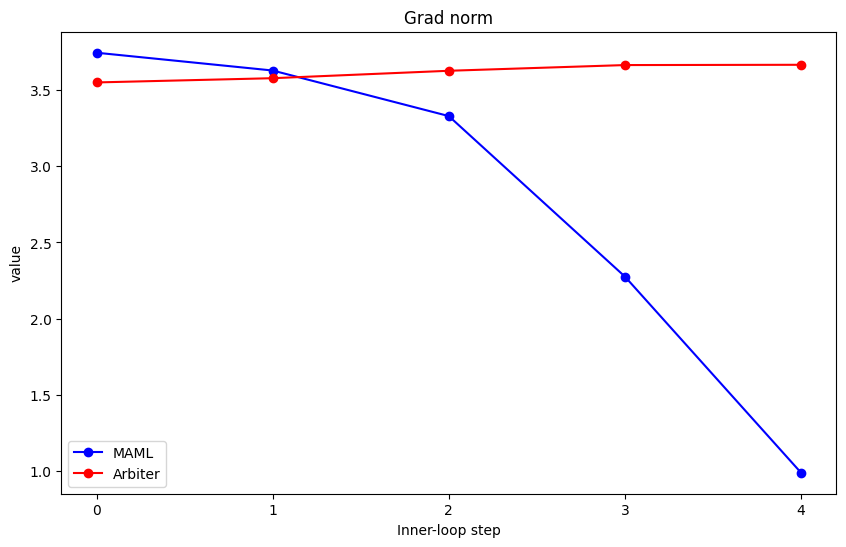

In [58]:
group_names = []

for name, group in maml_per_inner_loop_step:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_per_inner_loop_step['all_grads_l2norm'].mean()
arbiter_mean_df = arbiter_per_inner_loop_step['all_grads_l2norm'].mean()
arbiter_withoutWN_mean_df = arbiter_withoutWN_per_inner_loop_step['all_grads_l2norm'].mean()
arbiter_withoutGN_mean_df = arbiter_withoutGN_per_inner_loop_step['all_grads_l2norm'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values
arbiter_withoutWN_means = arbiter_withoutWN_mean_df.values
arbiter_withoutGN_means = arbiter_withoutGN_mean_df.values

# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)
arbiter_withoutWN_means = np.log(arbiter_withoutWN_means)
arbiter_withoutGN_means = np.log(arbiter_withoutGN_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Grad norm')

Text(0.5, 1.0, 'Gradient Varaince')

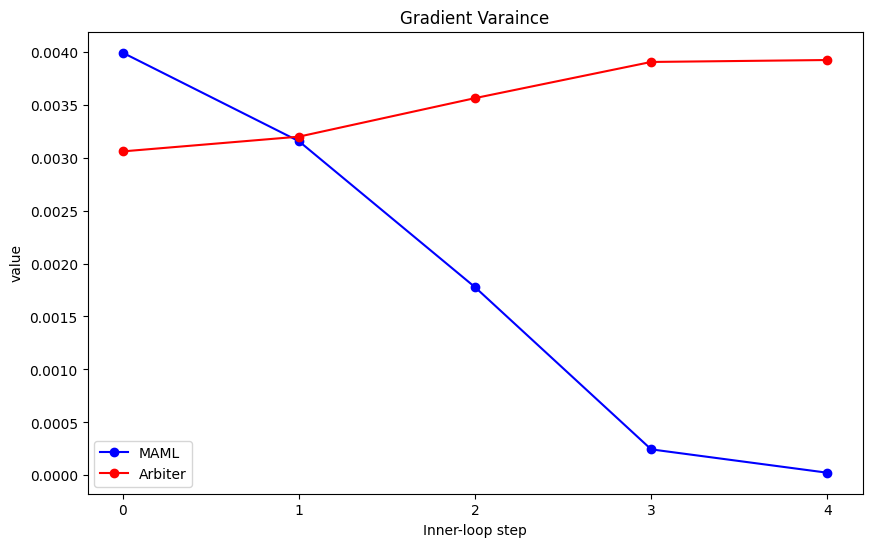

In [59]:
group_names = []

for name, group in maml_per_inner_loop_step:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_per_inner_loop_step['all_grads_var'].mean()
arbiter_mean_df = arbiter_per_inner_loop_step['all_grads_var'].mean()
arbiter_withoutWN_mean_df = arbiter_withoutWN_per_inner_loop_step['all_grads_var'].mean()
arbiter_withoutGN_mean_df = arbiter_withoutGN_per_inner_loop_step['all_grads_var'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values
arbiter_withoutWN_means = arbiter_withoutWN_mean_df.values
arbiter_withoutGN_means = arbiter_withoutGN_mean_df.values

# 데이터에 로그 변환 적용
# maml_means = np.log(maml_means)
# arbiter_means = np.log(arbiter_means)
# arbiter_withoutWN_means = np.log(arbiter_withoutWN_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Gradient Varaince')

Text(0.5, 1.0, 'Gradient Varaince')

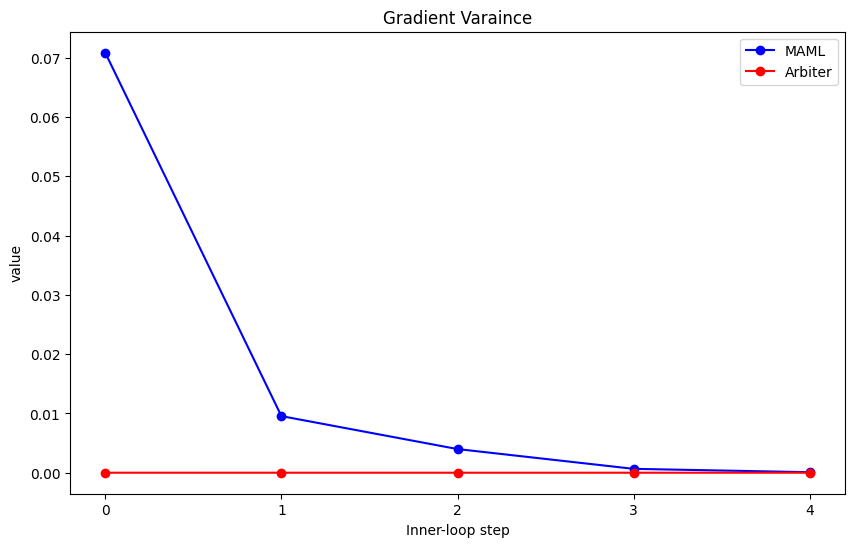

In [60]:
group_names = []

for name, group in maml_per_inner_loop_step:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_per_inner_loop_step['layer_dict.conv0.conv.weight_grad_var'].mean()
arbiter_mean_df = arbiter_per_inner_loop_step['layer_dict.conv0.conv.weight_grad_var'].mean()
arbiter_withoutWN_mean_df = arbiter_withoutWN_per_inner_loop_step['layer_dict.conv0.conv.weight_grad_var'].mean()
arbiter_withoutGN_mean_df = arbiter_withoutGN_per_inner_loop_step['layer_dict.conv0.conv.weight_grad_var'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values
arbiter_withoutWN_means = arbiter_withoutWN_mean_df.values
arbiter_withoutGN_means = arbiter_withoutGN_mean_df.values

# 데이터에 로그 변환 적용
# maml_means = np.log(maml_means)
# arbiter_means = np.log(arbiter_means)
# arbiter_withoutWN_means = np.log(arbiter_withoutWN_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Gradient Varaince')

Text(0.5, 1.0, 'Gradient Varaince')

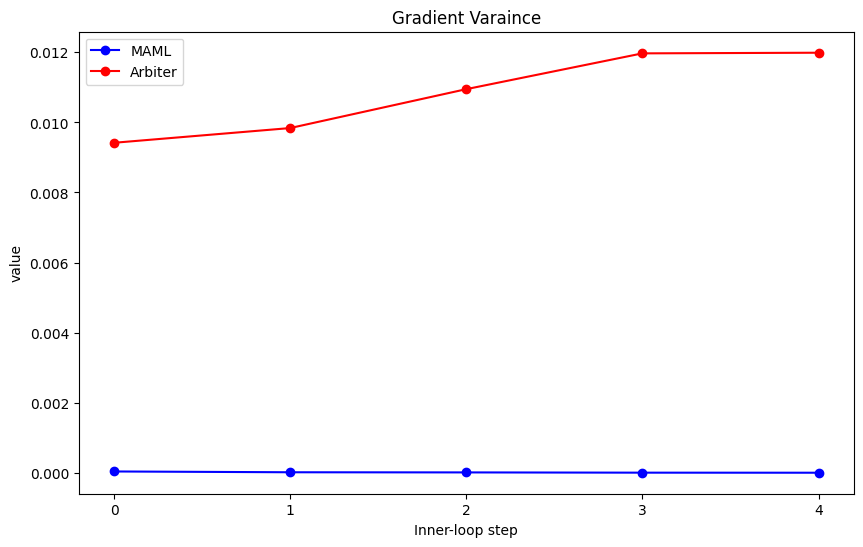

In [61]:
group_names = []

for name, group in maml_per_inner_loop_step:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_per_inner_loop_step['layer_dict.conv3.conv.weight_grad_var'].mean()
arbiter_mean_df = arbiter_per_inner_loop_step['layer_dict.conv3.conv.weight_grad_var'].mean()
arbiter_withoutWN_mean_df = arbiter_withoutWN_per_inner_loop_step['layer_dict.conv3.conv.weight_grad_var'].mean()
arbiter_withoutGN_mean_df = arbiter_withoutGN_per_inner_loop_step['layer_dict.conv3.conv.weight_grad_var'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values
arbiter_withoutWN_means = arbiter_withoutWN_mean_df.values
arbiter_withoutGN_means = arbiter_withoutGN_mean_df.values

# 데이터에 로그 변환 적용
# maml_means = np.log(maml_means)
# arbiter_means = np.log(arbiter_means)
# arbiter_withoutWN_means = np.log(arbiter_withoutWN_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Gradient Varaince')

Text(0.5, 1.0, 'Gradient Varaince')

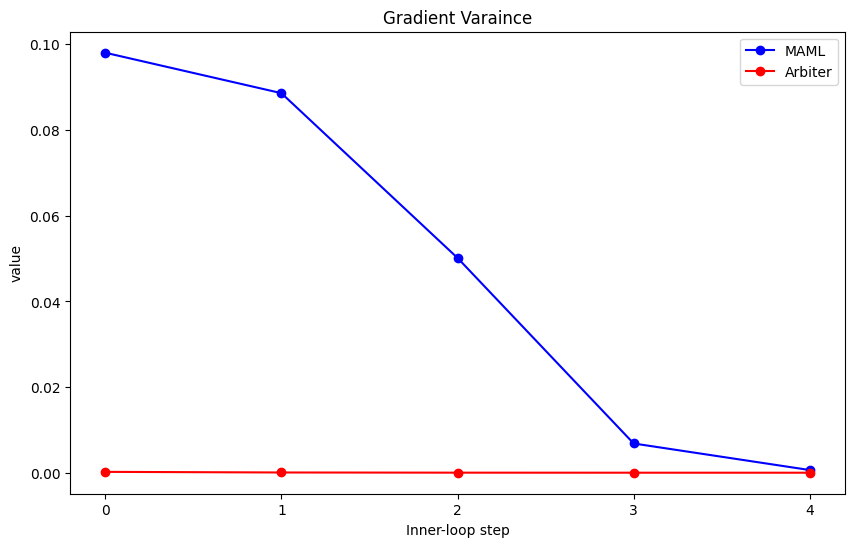

In [62]:
group_names = []

for name, group in maml_per_inner_loop_step:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_per_inner_loop_step['layer_dict.linear.weights_grad_var'].mean()
arbiter_mean_df = arbiter_per_inner_loop_step['layer_dict.linear.weights_grad_var'].mean()
arbiter_withoutWN_mean_df = arbiter_withoutWN_per_inner_loop_step['layer_dict.linear.weights_grad_var'].mean()
arbiter_withoutGN_mean_df = arbiter_withoutGN_per_inner_loop_step['layer_dict.linear.weights_grad_var'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values
arbiter_withoutWN_means = arbiter_withoutWN_mean_df.values
arbiter_withoutGN_means = arbiter_withoutGN_mean_df.values

# 데이터에 로그 변환 적용
# maml_means = np.log(maml_means)
# arbiter_means = np.log(arbiter_means)
# arbiter_withoutWN_means = np.log(arbiter_withoutWN_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Gradient Varaince')

Text(0.5, 1.0, 'GSNR')

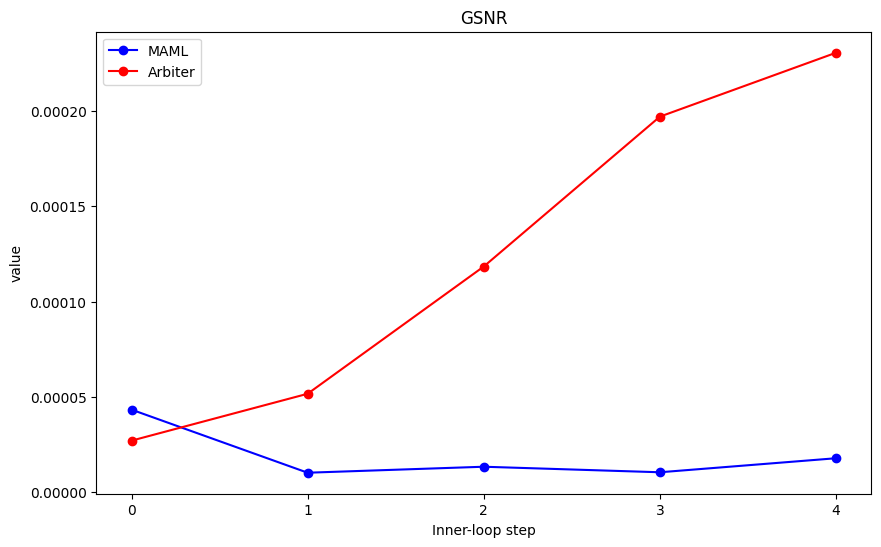

In [63]:
group_names = []

for name, group in maml_per_inner_loop_step:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_per_inner_loop_step['gsnr'].mean()
arbiter_mean_df = arbiter_per_inner_loop_step['gsnr'].mean()
arbiter_withoutWN_mean_df = arbiter_withoutWN_per_inner_loop_step['gsnr'].mean()
arbiter_withoutGN_mean_df = arbiter_withoutGN_per_inner_loop_step['gsnr'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values
arbiter_withoutWN_means = arbiter_withoutWN_mean_df.values
arbiter_withoutGN_means = arbiter_withoutGN_mean_df.values

# 데이터에 로그 변환 적용
# maml_means = np.log(maml_means)
# arbiter_means = np.log(arbiter_means)
# arbiter_withoutWN_means = np.log(arbiter_withoutWN_means)
# arbiter_withoutGN_means = np.log(arbiter_withoutGN_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('GSNR')